***Question1***

In [ ]:
!wget "http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv"

--2023-10-14 01:29:19--  http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv
Resolving motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)... 128.101.106.27
Connecting to motioncore-umh.cs.umn.edu (motioncore-umh.cs.umn.edu)|128.101.106.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 445082 (435K) [text/csv]
Saving to: ‘sms_spam_cleaned.csv.1’

sms_spam_cleaned.cs 100%[===================>] 434.65K  --.-KB/s    in 0.1s    

2023-10-14 01:29:19 (3.03 MB/s) - ‘sms_spam_cleaned.csv.1’ saved [445082/445082]



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sms_spam_cleaned.csv')
df['type'] = df['type'].map({'ham': 0, 'spam': 1})

In [ ]:
# Create a TF-IDF vectorizer to convert text messages into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['msg'])

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_counts = df['cluster'].value_counts()

In [ ]:
spam_percentage = df.groupby('cluster')['type'].mean() * 100

In [ ]:
expected_spam_percentage = df['type'].mean() * 100
expected_spam_percentage

12.914156626506024

In [ ]:
actual_spam_percentage = spam_percentage[cluster]
actual_spam_percentage

0.4149377593360996

We can see that expected_spam_percentage and actual_spam_percentage are not the same:-
- points might be vaery far aways from cluster center but still within its boundary resulting in incorrect prediction.
- could be because of squared euclidean distance and not using mahalanobis disctance
- bad cluster quality

There is difference of -20%

***Question2***

In [ ]:
# part a.
import os
import nltk.stem
from wordcloud import WordCloud
import numpy as np

In [ ]:
english_stemmer = nltk.stem.SnowballStemmer('english')

In [ ]:
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [ ]:
#vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df['msg'])

After analyzing the cluster results using the function below, I decided to choose certain specific clusters for my analysis.

In [ ]:
def spam_cluster_summary(df):
    # Calculate the counts of items in each cluster
    cluster_counts = df['cluster'].value_counts()
    print("Cluster Counts:")
    print(cluster_counts)

    # Calculate the percentage of spam in each cluster
    cluster_spam_percentages = df.groupby('cluster')['type'].mean() * 100
    print("\nCluster Spam Percentages:")
    print(cluster_spam_percentages)

    # Calculate the overall spam percentage in the dataset
    overall_spam_percentage = df['type'].mean() * 100
    print(f"\nOverall Spam Percentage in Dataset: {overall_spam_percentage:.2f}%")

    # Print cluster summary
    print("\nCluster Summary:")
    for cluster, count in cluster_counts.items():
        spam_percentage = cluster_spam_percentages[cluster]
        print(f"Cluster {cluster}:")
        print(f"Total items: {count}")
        print(f"Spam Percentage: {spam_percentage:.2f}%\n")

# You can call this function by passing your DataFrame (df) as an argument.
spam_cluster_summary(df)


Cluster Counts:
14    2169
0      802
9      444
2      380
15     364
7      250
13     236
6      225
3      195
1      141
11      85
4       14
12       2
10       2
5        1
16       1
8        1
Name: cluster, dtype: int64

Cluster Spam Percentages:
cluster
0      8.478803
1     13.475177
2      9.473684
3      3.589744
4      0.000000
5      0.000000
6      3.111111
7     90.000000
8      0.000000
9      1.801802
10     0.000000
11     1.176471
12     0.000000
13    15.677966
14     3.181189
15    57.417582
16     0.000000
Name: type, dtype: float64

Overall Spam Percentage in Dataset: 12.91%

Cluster Summary:
Cluster 14:
Total items: 2169
Spam Percentage: 3.18%

Cluster 0:
Total items: 802
Spam Percentage: 8.48%

Cluster 9:
Total items: 444
Spam Percentage: 1.80%

Cluster 2:
Total items: 380
Spam Percentage: 9.47%

Cluster 15:
Total items: 364
Spam Percentage: 57.42%

Cluster 7:
Total items: 250
Spam Percentage: 90.00%

Cluster 13:
Total items: 236
Spam Percentage: 15.68%

Cl

In [ ]:
km = KMeans(n_clusters= 17, init='random', n_init= 25, verbose=0)
km.fit(X_train)

KMeans(init='random', n_clusters=17, n_init=25)

In [ ]:
df['cluster'] = km.labels_


In [ ]:
clusters_analysis = [2, 7, 10, 11, 12, 13]

In [ ]:
cluster_id = 5


matching_indices = (km.labels_ == cluster_id) & (df['type'] == 'ham')

print(f"\nCluster Number: {cluster_id} (Ham Messages)\n{'-' * 30}\n")


for msg in df['msg'][matching_indices]:
    print("-", msg)

print("\n" + "="*50 + "\n")


Cluster Number: 5 (Ham Messages)
------------------------------






Cluster Number: 2
------------------------------



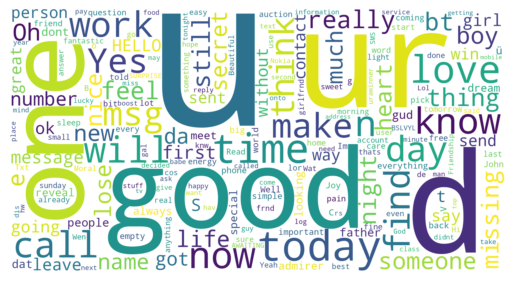

cluster size: 380
-So ü pay first lar... Then when is da stock comin...
-Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol
-here is my new address -apples&pairs&all that malarky
-Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone
-He is there. You call and meet him
-Whats the staff name who is taking class for us?
-The wine is flowing and i'm i have nevering..
-Yup i thk cine is better cos no need 2 go down 2 plaza mah.
-BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not GoTo wap. bangb. tv on UR mobile internet/service menu
-Hi frnd which is best way to avoid missunderstding wit our beloved one's?



Cluster Number: 7
------------------------------



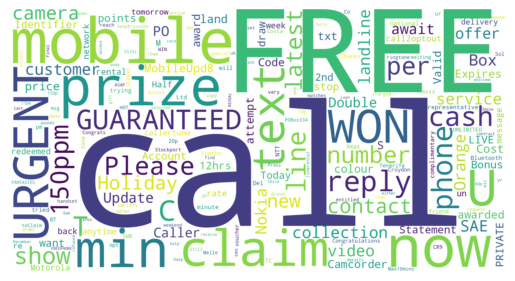

cluster size: 250
-As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
-Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
-07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow
-Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V Matrix3 StarWars3 etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 
-Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me.
-Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!
-As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been 

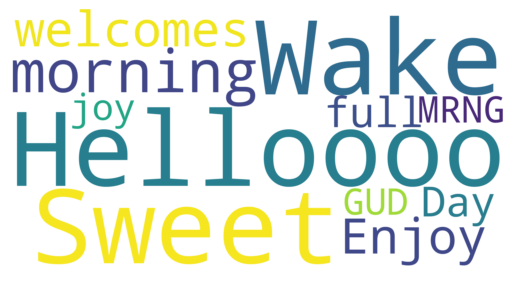

cluster size: 2
-Helloooo... Wake up..! Sweet morning welcomes You Enjoy This Day with full of joy.. GUD MRNG.
-Helloooo... Wake up..! Sweet morning welcomes You Enjoy This Day with full of joy.. GUD MRNG.



Cluster Number: 11
------------------------------



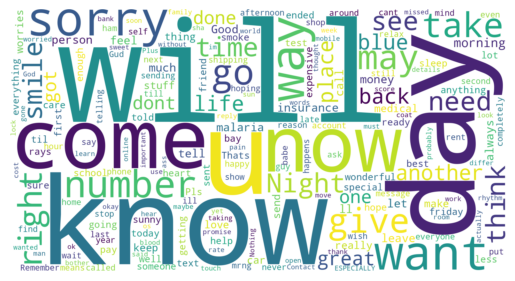

cluster size: 85
-I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
-Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You? 
-Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it since i was doing the best i could and you always seemed so happy about the cave. I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing.
-Sorry to be a pain. Is it ok if we meet another night? I spent late afternoon in casualty and that means i haven't done any of y stuff42moro and that includes all my time sheets and that. Sorry. 
-Just so that you knowyetunde hasn't sent money yet. I just sent her a text not to bother sending. So its ove

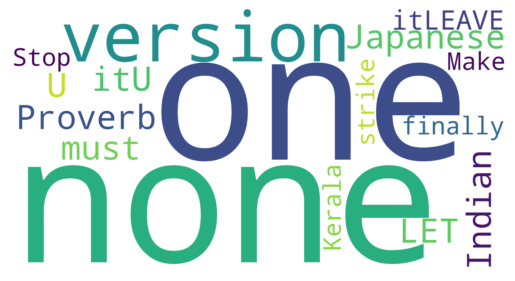

cluster size: 2
-Japanese Proverb: If one Can do it U too Can do it If none Can do itU must do it Indian version: If one Can do it LET HIM DO it.. If none Can do itLEAVE it!! And finally Kerala version: If one can do it Stop him doing it.. If none can do it Make a strike against it ...
-Japanese Proverb: If one Can do it U too Can do it If none Can do itU must do it Indian version: If one Can do it LET HIM DO it.. If none Can do itLEAVE it!! And finally Kerala version: If one can do it Stop him doing it.. If none can do it Make a strike against it ...



Cluster Number: 13
------------------------------



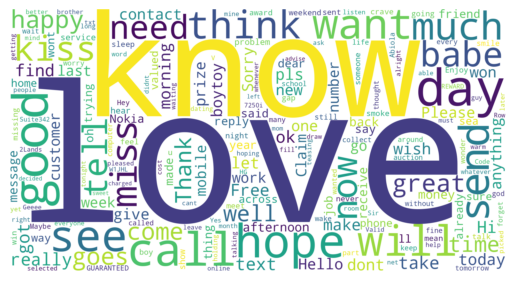

cluster size: 236
-Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?
-Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
-Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!
-Did I forget to tell you ? I want you  I need you I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmmm ... Yummy
-As a valued customer I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize call 09066364589
-GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
-Hello my love. What are you doing? Did you get to that interview today? Ar

In [ ]:
for cluster in clusters_analysis:
    matching_indices = (km.labels_ == cluster)
    all_text = " ".join(txt for txt in df['msg'][matching_indices].tolist())

    # Print cluster number
    print(f"\nCluster Number: {cluster}\n{'-' * 30}\n")

    word_cloud = WordCloud(collocations = False, background_color = 'white',
                           width = 2048, height = 1080).generate(all_text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    print("cluster size:", df['msg'][matching_indices].size)
    print("-" + "\n-".join(txt for txt in df['msg'][matching_indices].head(10)))
    print("\n" + "="*50 + "\n")

***Part B***:

Spam messages clustered in non-spam:<br>
***Cluster 380***: BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not GoTo wap. bangb. tv on UR mobile internet/service menu. <br>
***Cluster 85***: Night has ended for another day morning has come in a special way. May you smile like the sunny rays and leaves your worries at the blue blue bay.

Non-spam messages clustered in spam:<br>
***Cluster 236***: Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?<br>
***Cluster 2***: He is there. You call and meet him

***Part C***:
My function clearly distributes these texts into clusters.

In [ ]:
new_texts = ["Hey, are yo here?", "Congrats! you just won lottery.", "Hey, how id it going?", "ALERT, reply back immediately!!"]
new_vectors = vectorizer.transform(new_texts).toarray()

# Compute distances using numpy.linalg.norm
distances = np.array([np.linalg.norm(new_vector - km.cluster_centers_, axis=1) for new_vector in new_vectors])

# Determine the cluster with the shortest distance for each message
closest_clusters = distances.argmin(axis=1)

# Print the results
for text, cluster in zip(new_texts, closest_clusters):
    print(f"'{text}' is closest to Cluster {cluster}")

'Hey, are yo here?' is closest to Cluster 14
'Congrats! you just won lottery.' is closest to Cluster 0
'Hey, how id it going?' is closest to Cluster 14
'ALERT, reply back immediately!!' is closest to Cluster 14


***Question3***

In [ ]:
# Part a.

import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
# Extract the message content
X = df['msg']

In [ ]:
# Create TF-IDF features for text data (similar to previous steps)
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_tfidf.toarray())

In [ ]:
# Add the PCA components to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]
df

,type,msg,cluster,PCA1,PCA2,PCA3
0,0,Go until jurong point crazy.. Available only i...,1,0.050721,-0.022732,-0.047878
1,0,Ok lar... Joking wif u oni...,0,0.210408,-0.087927,0.159393
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,0.018932,-0.007870,-0.063272
3,0,U dun say so early hor... U c already then say...,1,0.082474,-0.043871,-0.034451
4,0,Nah I don't think he goes to usf he lives arou...,1,0.009483,-0.026323,-0.037254
...,...,...,...,...,...,...
5307,1,REMINDER FROM O2: To get 2.50 pounds free call...,1,-0.019172,0.035758,-0.056339
5308,1,This is the 2nd time we have tried 2 contact u...,1,0.001114,0.036915,-0.092517
5309,0,Will ü b going to esplanade fr home?,1,0.028984,-0.027450,-0.053174
5310,0,Pity * was in mood for that. So...any other su...,1,0.010423,-0.015922,-0.047708


In [ ]:
# Create the 3D scatter plot with hover information
fig = px.scatter_3d(
    df,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='type',  # You can color points by 'Type' (spam/ham)
    hover_data={'PCA1', 'PCA2', 'PCA3', 'msg'},  # Include 'Msg' for hover information
    labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'},
)

In [ ]:
# Show the plot in Jupyter Notebook (if using Jupyter)
fig.show()

Part b

Two spam message points far way from each other are:
1. spam1 = (0.1660697, 0.007356725, 0.05824058)
2. spam2 = (-0.06562231, 0.2234594, 0.0575738)

These points are atypical to PCA because they don't lie on any of the principal component structure. These also represent the outliers by PCA.

In [ ]:
# Part c.
import matplotlib.pyplot as plt

In [ ]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

In [ ]:
# Determine the number of components needed for >50% explained variance
num_components_50_percent = (cumulative_explained_variance > 0.5).sum() + 1
num_components_50_percent

1

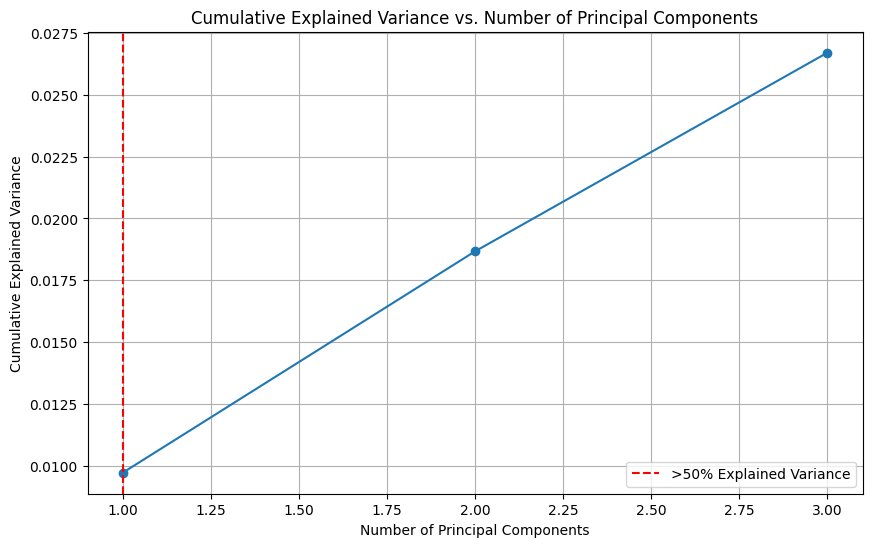

In [ ]:
# Create a graph to visualize the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.axvline(x=num_components_50_percent, color='red', linestyle='--', label=f'>{50}% Explained Variance')
plt.legend()
plt.show()

***Question4***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

In [ ]:
# Separate features (X) and labels (y)
X = df['msg']
y = df['type']

In [ ]:
# Vectorize the text features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Full vectorized features - 1-NN Classifier
full_vectorized_classifier = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Measure the runtime
start_time = time.time()
full_vectorized_classifier.fit(X_train, y_train)
full_vectorized_runtime = time.time() - start_time

In [ ]:
# Predict on the test data
y_pred_full_vectorized = full_vectorized_classifier.predict(X_test)

In [ ]:
# Calculate accuracy and F1-score
accuracy_full_vectorized = accuracy_score(y_test, y_pred_full_vectorized)
f1_score_full_vectorized = f1_score(y_test, y_pred_full_vectorized)

In [ ]:
# Print results
print("Full Vectorized Features Classifier:")
print(f"Runtime: {full_vectorized_runtime:.4f} seconds")
print(f"Accuracy: {accuracy_full_vectorized:.4f}")
print(f"F1-Score: {f1_score_full_vectorized:.4f}")

Full Vectorized Features Classifier:
Runtime: 0.0026 seconds
Accuracy: 0.9558
F1-Score: 0.8050


In [ ]:
# PCA for dimensionality reduction (choose k, the number of top components)
k = 50  # See the elbow test below for k value selection

In [ ]:
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [ ]:
# Low Dimensional Space - 1-NN Classifier
low_dimensional_classifier = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Measure the runtime
start_time = time.time()
low_dimensional_classifier.fit(X_train_pca, y_train)
low_dimensional_runtime = time.time() - start_time

In [ ]:
# Predict on the test data
y_pred_low_dimensional = low_dimensional_classifier.predict(X_test_pca)

In [ ]:
# Calculate accuracy and F1-score
accuracy_low_dimensional = accuracy_score(y_test, y_pred_low_dimensional)
f1_score_low_dimensional = f1_score(y_test, y_pred_low_dimensional)

In [ ]:
# Print results
print("\nLow Dimensional Space Classifier (PCA with k components):")
print(f"Runtime: {low_dimensional_runtime:.4f} seconds")
print(f"Accuracy: {accuracy_low_dimensional:.4f}")
print(f"F1-Score: {f1_score_low_dimensional:.4f}")


Low Dimensional Space Classifier (PCA with k components):
Runtime: 0.0031 seconds
Accuracy: 0.9548
F1-Score: 0.8367


***Elbow test*** to find an optimal k for PCA.

In [ ]:
# Perform PCA with different numbers of components
explained_variance = []
components_range = range(1, 50)

In [ ]:
for k in components_range:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train.toarray())
    explained_variance.append(pca.explained_variance_ratio_.sum())

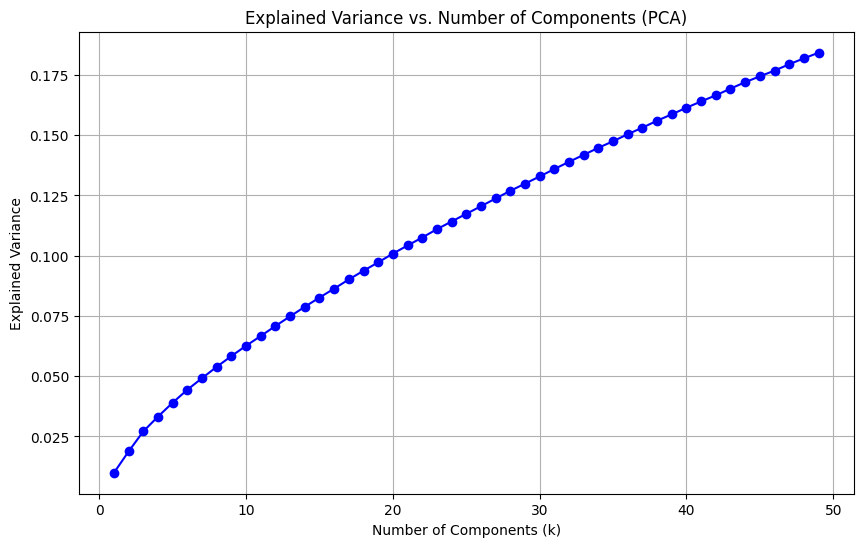

In [ ]:
# Plot the explained variance for each value of k
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components (k)')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components (PCA)')
plt.grid()

Making sure there is ***data leakage***

1. Test-train split before processing/ training the data
2. All of our preprocessing is only based on training data now

***Question5***

I'm using KNN + PCA to solve this, similar to question no. 4
Additionally, I'm deciding to not use stemming but develop my vector arrays by tfidf fucntions, built in previous questions. And there is not data leak because:
1. Test-train split before processing/ training the data
2. All of our preprocessing is only based on training data now

In [ ]:
# PCA for dimensionality reduction (choose k, the number of top components)
k = 50  # See the elbow test below for k value selection

In [ ]:
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [ ]:
# Low Dimensional Space - 1-NN Classifier
low_dimensional_classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
low_dimensional_classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on the test data
y_pred_low_dimensional = low_dimensional_classifier.predict(X_test_pca)

In [ ]:
# Calculate accuracy and F1-score
accuracy_low_dimensional = accuracy_score(y_test, y_pred_low_dimensional)
f1_score_low_dimensional = f1_score(y_test, y_pred_low_dimensional)

In [ ]:
# Print results
print("\nLow Dimensional Space Classifier (PCA with k components):")
print(f"Accuracy: {accuracy_low_dimensional:.4f}")
print(f"F1-Score: {f1_score_low_dimensional:.4f}")


Low Dimensional Space Classifier (PCA with k components):
Accuracy: 0.9539
F1-Score: 0.8281
